In [1]:
# 1.1 1. Hyperparameter Tuning and Model Selection
# 1.1.1 1.1 [10 pts] Using Grid Search for Hyperparameter Tuning

# In this exercise, you will be working with the Breast Cancer Wisconsin dataset, which contains 569
# samples of malignant and benign tumor cells.
# The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnoses (M = malignant, B = benign), respectively. Columns 3-32 contain 30 real-valued
# features that have been computed from digitized images of the cell nuclei, which can be used to
# build a model to predict whether a tumor is benign or malignant. The Breast Cancer Wisconsin
# dataset has been deposited in the UCI Machine Learning Repository, and more detailed information
# about this dataset can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wi
# sconsin+(Diagnostic).
# The next cell loads the datasets and converts the class label M (malignant) to a integer 1 and the
# label B (benign) to class label 0.

# EXECUTE BUT DO NOT MODIFY THIS CELL
import pandas as pd
df = pd.read_csv('wdbc.data', header=None)
# convert class label "M"->1 and label "B"->0
df[1] = df[1].apply(lambda x: 1 if x == 'M' else 0)
print (df.head())

         0   1      2      3       4       5        6        7       8   \
0    842302   1  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517   1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903   1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301   1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402   1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  

In [2]:
# EXECUTE BUT DO NOT MODIFY THIS CELL
from sklearn.model_selection import train_test_split
y = df[1].values
X = df.loc[:, 2:].values
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=0,stratify=y)

# Now, your task is to use GridSearchCV from scikit-learn to find the best parameter for n_neighbors
# of a KNearestNeighborClassifier
# As hyperparameter values, you only need to consider the number of n_neighbors within the range
# 1-16 (including 16)

In [3]:
# MODIFY THIS CELL
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(),
					 KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': list(range(1, 17))}]

gs = GridSearchCV(pipe,
				 param_grid,
				 iid=False,
				 n_jobs=-1,
				 refit=True,
				 scoring='accuracy',
				 cv=10)

gs.fit(X_train, y_train)
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))

Best Accuracy: 97.24%


In [4]:
# Next, print the best parameters obtained from the GridSearchCV run and compute the accuracy a
# KNearestNeighborClassifier would achieve with these settings on the test set (X_test, y_test).
print('Best Params: %s' % gs.best_params_)

from sklearn.metrics import accuracy_score
print('Test Accuracy: %.2f%%' % (100 * accuracy_score(gs.predict(X_test), y_test)))

Best Params: {'kneighborsclassifier__n_neighbors': 5}
Test Accuracy: 94.15%


In [5]:
# 1.1.2 1.2 [10 pts] Estimate the Generalization Performance using the ‘.632+’ Bootstrap
import sys
sys.path.append(r'c:\users\USERNAME\appdata\local\programs\python\python38-32\lib\site-packages')

import mlxtend
from mlxtend.evaluate import bootstrap_point632_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
scores = bootstrap_point632_score(DecisionTreeClassifier(random_state=1), X, y, n_splits=200, method = '.632+')
acc = np.mean(scores)
print('Accuracy: %.2f%%' % (100*acc))


Accuracy: 95.03%


In [6]:
# MODIFY THIS CELL
lower = np.percentile(scores, 2.5)
upper = np.percentile(scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [92.69, 97.62]


In [7]:
# 1.2.1 2.1 [10 pts] Contructing a Binary Confusion Matrix
%matplotlib inline

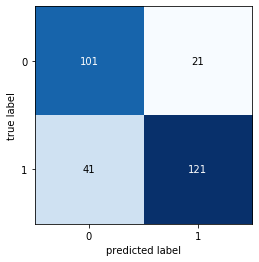

In [8]:
import numpy as np
import helper
from helper import plot_confusion_matrix
import matplotlib.pyplot as plt
example_cm = np.array([[101, 21], [41, 121]])
plot_confusion_matrix(example_cm)
plt.show()

In [9]:
y_true = np.array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])
y_predicted = np.array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

def confusion_matrix_binary(y_true, y_predicted):
	tp, fn, fp, tn = 0, 0, 0, 0
	for i, j in zip(y_true, y_predicted):
		if i == j:
			if i == 0:
				tn += 1
			else:
				tp += 1
		else:
			if i == 0:
				fn += 1
			else:
				fp += 1

	conf_matrix = np.zeros(4).reshape(2, 2).astype(int)
	conf_matrix[0, 0] = tn
	conf_matrix[0, 1] = fn
	conf_matrix[1, 0] = fp
	conf_matrix[1, 1] = tp
	
	return conf_matrix

result_matrix = confusion_matrix_binary(y_true, y_predicted)


In [10]:
print('Confusion matrix array:\n', result_matrix)

Confusion matrix array:
 [[7 0]
 [4 9]]


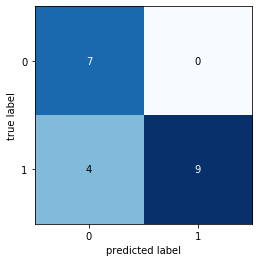

In [11]:
plot_confusion_matrix(result_matrix)
plt.show()

In [12]:
# 1.2.2 2.2 [10 pts] Constructing a Multiclass Confusion Matrix
import numpy as np
def confusion_matrix_multiclass(y_true, y_predicted):
	n = 5
	matrix = np.zeros(n*n).reshape(n, n).astype(int)
	for i,j in zip(y_true, y_predicted):
		if i == j:
			matrix[i, i] += 1
		else:
			matrix[i, j] += 1

	return matrix

y_true = [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]
result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
print (result_matrix)

[[2 2 0 0 0]
 [1 6 1 1 0]
 [1 0 4 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


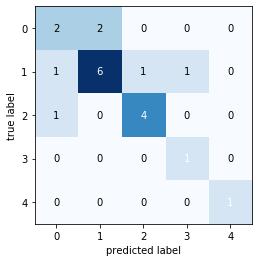

In [13]:
from helper import plot_confusion_matrix
plot_confusion_matrix(result_matrix)
plt.show()

Positive Label 0:
 [[ 2  2]
 [ 2 14]]


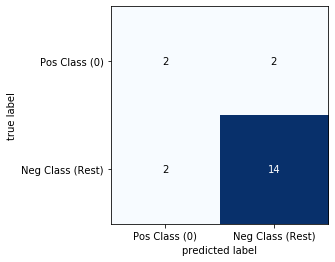

In [14]:
# 1.2.3 2.3 [10 pts] Binary Confusion Matrices for Multiclass Problems
def binary_cm_from_multiclass(y_true, y_predicted, positive_label):
	y_true_ary = np.array(y_true)
	y_predicted_ary = np.array(y_predicted)
	y_true_mod = np.where(y_true_ary<=0, y_true_ary, 1)
	y_predicted_mod = np.where(y_predicted_ary<=0, y_predicted_ary, 1)
	cm = confusion_matrix_binary(y_true_mod, y_predicted_mod)
	return cm

y_true = [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]
mat_pos0 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=0)
print('Positive Label 0:\n', mat_pos0)
fig, ax = plot_confusion_matrix(mat_pos0)
ax.set_xticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)']);
plt.show()

In [52]:
# 1.3 3. [10 pts] Balanced Accuracy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
def balanced_accuracy(y_true, y_predicted):
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    unique_labels = np.unique(np.concatenate((y_true_ary, y_predicted_ary)))
    class_accuracies = []
    for l in unique_labels:
        acc = confusion_matrix_binary(y_true, y_predicted)
        acc =  round(0.85*(acc[0,0]/(acc[0,0]+acc[0,1]) + acc[1,1]/(acc[1,1]+acc[1,0])), 4)
        class_accuracies.append(acc)
    return np.mean(class_accuracies)

y_targ = [1, 1, 2, 1, 1, 2, 0, 3]
y_pred = [0, 0, 2, 1, 1, 2, 1, 3]
print (balanced_accuracy(y_targ, y_pred))


0.6071


In [16]:
# 1.4 4. Receiver Operator Characteristics (ROC)
# 1.4.1 4.1 [10 pts] Plotting a ROC curve
# EXECUTE BUT DO NOT MODIFY THIS CELL


from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X, y = iris_data()
X, y = X[:100, [1]], y[:100]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0, stratify=y)

model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)

print(y_probabilities)

[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
 [0.89133165 0.10866835]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.56957726 0.43042274]
 [0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.50487831 0.49512169]
 [0.05482486 0.94517514]
 [0.82965589 0.17034411]
 [0.86339788 0.13660212]
 [0.17593095 0.82406905]
 [0.50487831 0.49512169]
 [0.3771385  0.6228615 ]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.17593095 0.82406905]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]
 [0.6319844  0.3680156 ]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]


In [17]:
import matplotlib.pyplot as plt
import numpy as np


def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=100):

    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)
    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - np.sum(y_true == pos_label)

    for i, thr in enumerate(thresholds):
        
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = np.where(binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / (num_negatives*1.0))
        y_axis_values.append(num_true_positives / (num_positives*1.0))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None


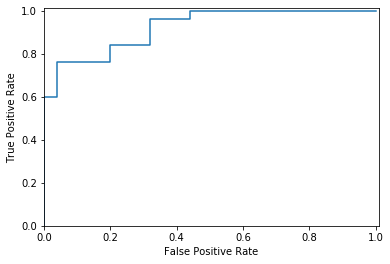

In [18]:
plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()


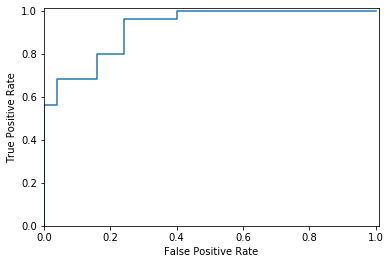

In [19]:
plot_roc_curve(y_test, y_probabilities[:, 0], pos_label=0)
plt.show()

In [20]:
# 1.4.2 4.2 [10 pts] Calculating the ROC AUC
from sklearn.metrics import roc_auc_score
def plot_roc_curve_plus_auc(y_true, y_score, pos_label=1, num_thresholds=100):
    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)
    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - np.sum(y_true == pos_label)

    for i, thr in enumerate(thresholds):
        
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = np.where(binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / (num_negatives*1.0))
        y_axis_values.append(num_true_positives / (num_positives*1.0))

    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return roc_auc_score(y_true, y_score_ary)

ROC AUC: 0.1032


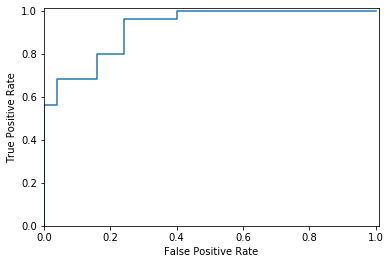

In [21]:
auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 0], pos_label=0)
print('ROC AUC: %.4f' % auc)

ROC AUC: 0.8968


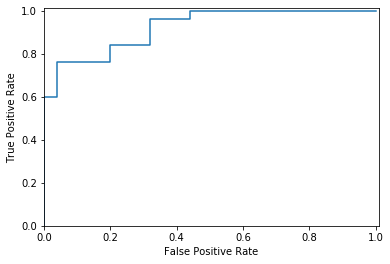

In [22]:
auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 1], pos_label=1)
print('ROC AUC: %.4f' % auc)

In [23]:
# 1.5 5. Feature Importance
# 1.5.1 [10 pts] 5.1 Drop-Column Feature Importance

# EXECUTE BUT DO NOT MODIFY THIS CELL
import pandas as pd
df_wine = pd.read_csv('wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [25]:
import numpy as np
from sklearn.model_selection import cross_val_score
def feature_importance_dropcolumn(estimator, X, y, cv=5):
    base_accuracy = np.mean(cross_val_score(estimator, X, y, cv=cv)*1.0)
    column_indices = np.arange(X.shape[1]).astype(int)
    drop_accuracies = np.zeros(column_indices.shape[0])
    for idx in column_indices:
        mask = np.ones(column_indices.shape[0]).astype(bool)
        mask[idx] = False
        drop_accuracy =  np.absolute((base_accuracy*1.0) - np.mean(cross_val_score(estimator, 
                                                                             X[:,mask], 
                                                                             y, 
                                                                             cv=cv)))
        drop_accuracies[idx] = drop_accuracy
    return drop_accuracies

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5))
feature_importance_dropcolumn(pipe, X=X_train, y=y_train, cv=5)

array([0.009     , 0.00033333, 0.008     , 0.01633333, 0.00766667,
       0.00802564, 0.01569231, 0.00833333, 0.00030769, 0.008     ,
       0.00030769, 0.00769231, 0.02402564])

In [27]:
# 1.5.2 [10 pts] 5.2 Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, random_state=0)
drop_importances = feature_importance_dropcolumn(forest,
                                                X=X_train,
                                                y=y_train,
                                                cv=5)

print('Drop Importance from RF:', drop_importances)

Drop Importance from RF: [0.00833333 0.         0.         0.008      0.         0.008
 0.008      0.         0.008      0.00802564 0.008      0.008
 0.00766667]


In [28]:
print ('Highest ranking/most important feature:', np.argsort(drop_importances).max())

Highest ranking/most important feature: 12


In [29]:
np.argsort(drop_importances)

array([ 1,  2,  4,  7, 12,  3,  5,  6,  8, 10, 11,  9,  0], dtype=int64)

In [30]:
# Which are the 3 most important features? You can either write the feature indices below that
# correspond to the most important features or write out the full column names (you can see the
# The three most important columns are 12, 11 and 10.

In [31]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print('Random Forest Feature Importance:\n', feature_importance_dropcolumn(forest,
                                                X=X_train,
                                                y=y_train,
                                                cv=5))

Random Forest Feature Importance:
 [0.01602564 0.         0.00864103 0.00030769 0.00064103 0.01664103
 0.00864103 0.00833333 0.01633333 0.00030769 0.00833333 0.01633333
 0.016     ]


In [32]:
np.argsort(feature_importance_dropcolumn(forest,
                                         X=X_train,
                                         y=y_train,
                                         cv=5))

array([ 1,  3,  9,  4,  7, 10,  2,  6, 12,  0,  8, 11,  5], dtype=int64)

In [33]:
# Which are the 3 most important features now? You can either write the feature indices below that
# correspond to the most important features or write out the full column names (you can see the
# column names in the pandas DataFrame in 5.1).
# The most important features are columns 1,  3 and 9. 

In [34]:
# Finally, use the feature_importance_permutation function from mlxtend
# (http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/) to
# compute the most important features. Inside the feature_importance_permutation function:
# • use a random seed of 0
# • use 50 permutation rounds

from mlxtend.evaluate import feature_importance_permutation
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train, y_train)
imp_features = feature_importance_permutation(predict_method=forest.predict, 
                                              X=X_test,
                                              y=y_test,
                                              metric='accuracy',
                                              num_rounds=50, 
                                              seed=0)
# then print the importance values
imp_vals, _ = feature_importance_permutation(predict_method=forest.predict, 
                                             X=X_test,
                                             y=y_test,
                                             metric='accuracy',
                                             num_rounds=1,
                                             seed=1)

imp_vals

array([0.03703704, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01851852, 0.        , 0.        , 0.14814815,
       0.        , 0.01851852, 0.05555556])

In [35]:

np.argsort(imp_vals)

array([ 1,  2,  3,  4,  5,  7,  8, 10,  6, 11,  0, 12,  9], dtype=int64)

In [36]:
# Which are the 3 most important features now? You can either write the feature indices below that
# correspond to the most important features or write out the full column names (you can see the
# column names in the pandas DataFrame in 5.1).

# The most important features are columns 1, 2 and 3. 

In [37]:
# 1.5.3 [10 pts] 5.3 Creating your Own Feature Selection Transformer Class
# EXECUTE BUT DO NOT EDIT THIS CELL
from sklearn.base import BaseEstimator
import numpy as np
class ColumnSelector(BaseEstimator):
    def __init__(self, cols=None):
        self.cols = cols
    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)
    def transform(self, X, y=None):
        feature_subset = X[:, self.cols]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    def fit(self, X, y=None):
        return self

In [38]:
import pandas as pd
df_wine = pd.read_csv('wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,random_state=0)

In [40]:
col_sele = ColumnSelector(cols=[0, 5, 8, 11])
reduced_subset = col_sele.transform(X_train)
print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_subset.shape)


Original feature set size: (124, 13)
Selected feature set size: (124, 4)


In [41]:
# Your task now is to use the feature_importances_ attribute from a fitted random forest model
# inside a custom feature selector. Using this feature selector, you should be able to select features
# as follows:
    # forest = RandomForestClassifier(n_estimators=100, random_state=123)
    # selector = ImportanceSelector(num_features=3, random_forest_estimator=forest)
    # selector.fit(X_train, y_train)
    # reduced_train_features = selector.transform(X_train, y_train)
# • If num_features=3 as shown above, this means that we are interested to select the top 3 most
# important features from a dataset based on the random forest feature importance values.
# • Actually, while it might be more interesting to implement a feature selctor based on the
# column-drop performance (which would then be somewhat related to sequential feature selection), we use the feature importance values from a RandomForest’s feature_importances_
# attribute for simplicity here, to allow you to implement this method in case your
# feature_importance_dropcolumn function does not work correctly.

In [42]:
from sklearn.base import BaseEstimator
import numpy as np
class ImportanceSelector(BaseEstimator):
    def __init__(self, num_features, random_forest_estimator):
        self.num_features = num_features
        self.forest = random_forest_estimator
        
    def transform(self, X, y=None):
        # Feature by increasing feature importance:
        features_by_importance = forest.feature_importances_
        
        top_k_feature_indices = np.argsort(features_by_importance)
        feature_subset = X[:, top_k_feature_indices]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    
    def fit(self, X, y=None):
        self.forest.fit(X, y)
        return self

In [43]:
# Now, use the ImportanceSelector to select the 3 most important features in the dataset:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=123)
selector = ImportanceSelector(num_features=3, random_forest_estimator=forest)
selector.fit(X_train, y_train)
reduced_train_features = selector.transform(X_train, y_train)
print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_train_features.shape)
print('First 5 rows:\n', reduced_train_features[:5])

Original feature set size: (124, 13)
Selected feature set size: (124, 13)
First 5 rows:
 [[2.350e+00 4.700e-01 2.000e+01 1.020e+00 4.950e+00 9.200e+01 9.100e-01
  2.000e+00 1.362e+01 2.050e+00 4.400e+00 8.000e-01 5.500e+02]
 [2.700e+00 5.000e-01 1.950e+01 1.350e+00 1.530e+00 1.320e+02 1.250e+00
  2.950e+00 1.376e+01 3.000e+00 5.400e+00 2.740e+00 1.235e+03]
 [2.700e+00 2.900e-01 2.250e+01 2.380e+00 1.500e+00 1.010e+02 1.190e+00
  3.000e+00 1.373e+01 2.710e+00 5.700e+00 3.250e+00 1.285e+03]
 [2.650e+00 2.900e-01 1.900e+01 1.540e+00 1.800e+00 1.100e+02 1.100e+00
  2.350e+00 1.351e+01 2.870e+00 4.200e+00 2.530e+00 1.095e+03]
 [2.200e+00 6.300e-01 1.850e+01 9.400e-01 2.460e+00 9.400e+01 7.300e-01
  1.620e+00 1.260e+01 1.580e+00 7.100e+00 6.600e-01 6.950e+02]]
